**I am supposed to design an SSIS package that performs the database backup process. The task requirements are as follows:**

1. This package should be able to create a compressed backup version from any desired database. 
2. The database name and the path need to be passed as inputs via variables. 
3. After creating the backup, a record is entered into the ```BackupLog``` table. (The BackupLog table is created in the ```Tempdb``` database)
4. The generated backup should be moved from the source path to the ```C:\Temp path```. 
5. If a file with the same name already exists, it should be overwritten.
6. After moving the file, a record is entered into the ```BackupLog``` table.


**First, create the BackupLog table in the tempdb database using the following query:**


```sql
CREATE TABLE BackupLog (
  BackupId INT IDENTITY(1,1) NOT NULL,
  DatabaseName VARCHAR(100) NOT NULL,
  LogType VARCHAR(20) NOT NULL,
  ActionDate DATETIME NOT NULL,
  CONSTRAINT PK_BackupLog PRIMARY KEY (BackupId)
);```

**This query creates a table called BackupLog in the tempdb database. The table has the following columns:**

* BackupId: The unique identifier for the backup record.
* DatabaseName: The name of the database that was backed up.
* LogType: The type of log that is 'CreateBackup' or 'MoveFile'. 
* ActionDate: The date and time the backup was created.
* The PRIMARY KEY constraint on the BackupId column ensures that each backup record has a unique identifier.

**Open Visual Studio and create a new Integration Services Project.**

* Start Visual Studio.
* In the New Project dialog box, select the Integration Services Project template.
* Define two variables in the Control Flow: **V_DatabaseName** and **V_BackupPath**.

1. In the ```Solution Explorer``` window, right-click the ```Control Flow``` folder and select Add > Variable.
2. In the Add Variable dialog box, select the ```User::Variable``` option.
3. In the Name field, type ```V_DatabaseName```.
4. In the Type field, select the ```String``` option.
5. In the Default Value field, type a default value for the variable.
6. Set a default amount to each variable.
7. Repeat steps 2-6 to create a variable named ```V_BackupPath```.



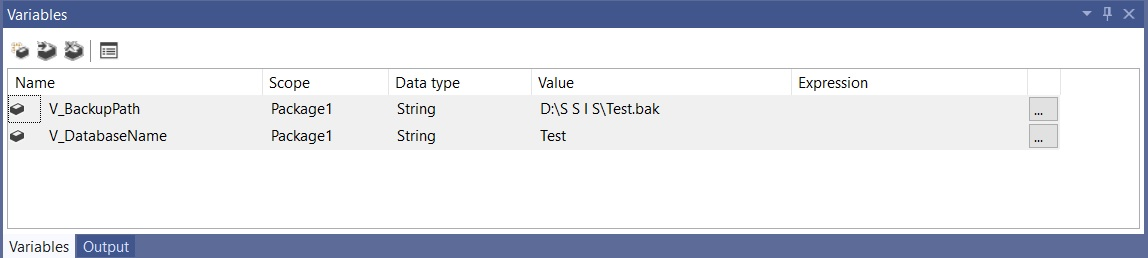

**Drag an Execute SQL Task from the Toolbox to the Control Flow.**

1. In the Toolbox window, locate the Execute SQL Task icon.
2. Drag the icon to the Control Flow area of the design surface.

**Double-click the Execute SQL Task to open the Execute SQL Task Editor.**

1. In the **Execute SQL Task Editor**, set the following properties:
* **Connection Type**: OLE DB
* **Connection**: Set a connection to the master database.
* **SQL Statement**: ```BACKUP DATABASE ? TO DISK = ? WITH COMPRESSION, FORMAT```



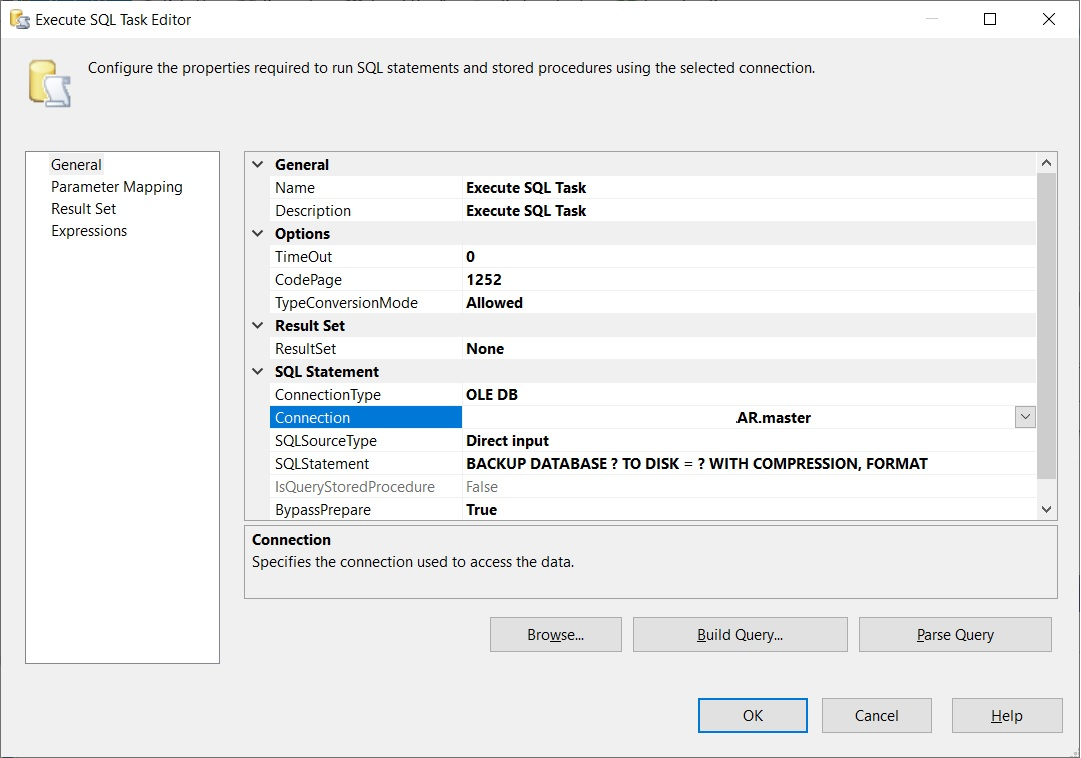

**In the Parameter Mapping tab, add two parameters that were defined before and set the parameter names by numbers.**

1. In the **Parameter Mapping** tab, click the **Add** button.
2. In the **Add Parameter** dialog box, set the following properties:
* **Parameter Name**: ```@DatabaseName```
* **Data Type**: ```String```
* **Value**: The name of the database to be backed up.
3. Repeat steps 1-2 to create a parameter named ```@BackupPath```.

**This gives you high performance.**

The ```@DatabaseName``` and ```@BackupPath``` parameters are used to specify the database to be backed up and the path to the backup file. By setting the parameter names by numbers, you can improve the performance of the package by avoiding the overhead of having to parse the parameter names as strings.

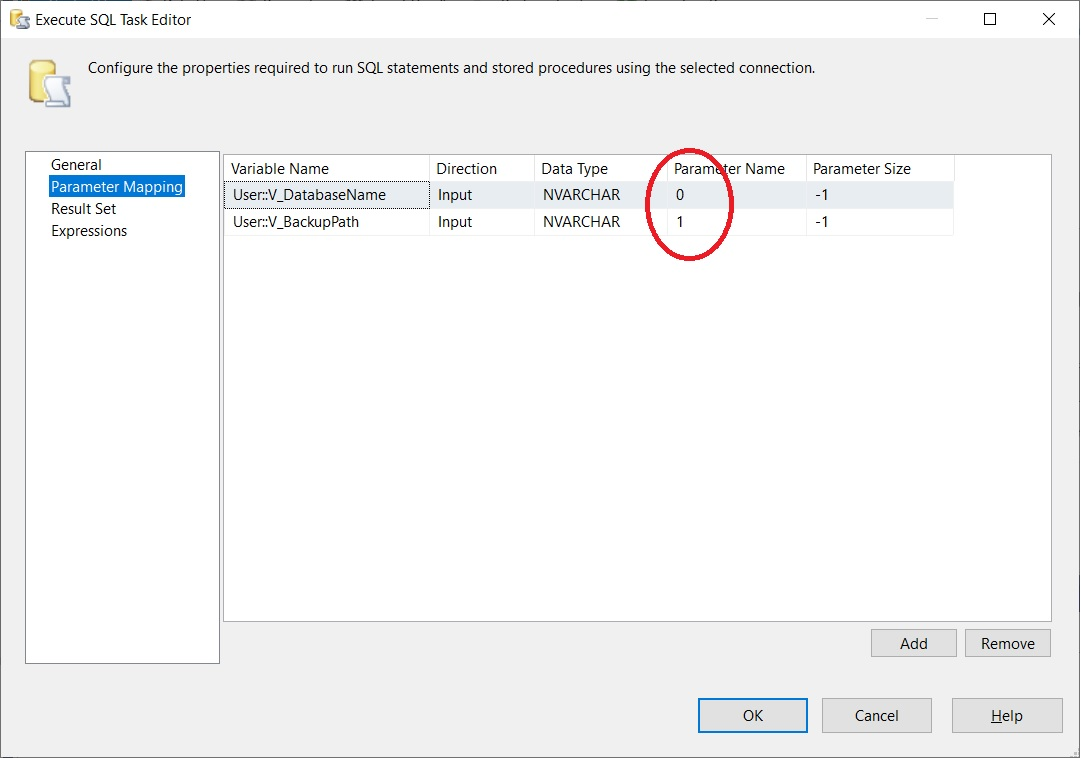

**To send a log to the ```BackupLog``` table, we can use another Execute SQL Task.**

1. Drag another **Execute SQL Task** from the Toolbox to the Control Flow.
2. Double-click the Execute SQL Task to open the Execute SQL Task Editor.
3. In the SQL Statement property, enter the following query:

```SQL
INSERT INTO BackupLog (DatabaseName, LogType, ActionDate)
VALUES (@DatabaseName, 'Create Backup', GETDATE());```

4. In the **Parameter Mapping** tab, add a parameter named ```@DatabaseName``` and set its value to the name of the database that was backed up.
5. Set the **Connection** property to the master database.
**The following images show how to set the properties of the Execute SQL Task:**

**To move the backup files onto our system, we can use a File System Task from the Toolbox.**

1. Drag a **File System Task** from the Toolbox to the Control Flow.
2. Double-click the **File System Task** to open the File System Task Editor.
3. In the **IsSourcePathVariable** property, set the value to ```TRUE```.
4. In the **Source Variable** property, select the ```V_BackupPath``` variable.
5. In the **Operation** property, select the Move File option.
6. In the **OverwriteDestination** property, set the value to ```TRUE```.
7. In the **Destination Connection** property, select the connection that points to the location where the backup files should be moved.

**The following images show how to set the properties of the File System Task:**

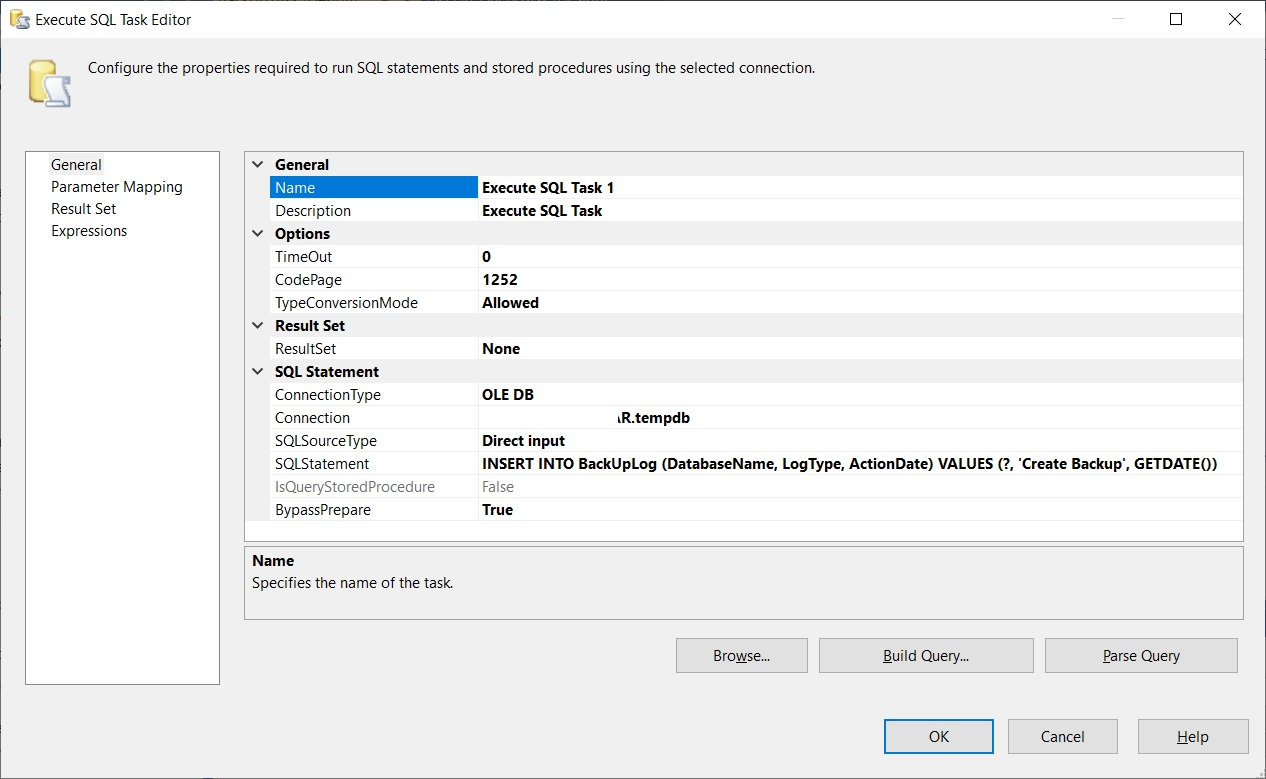

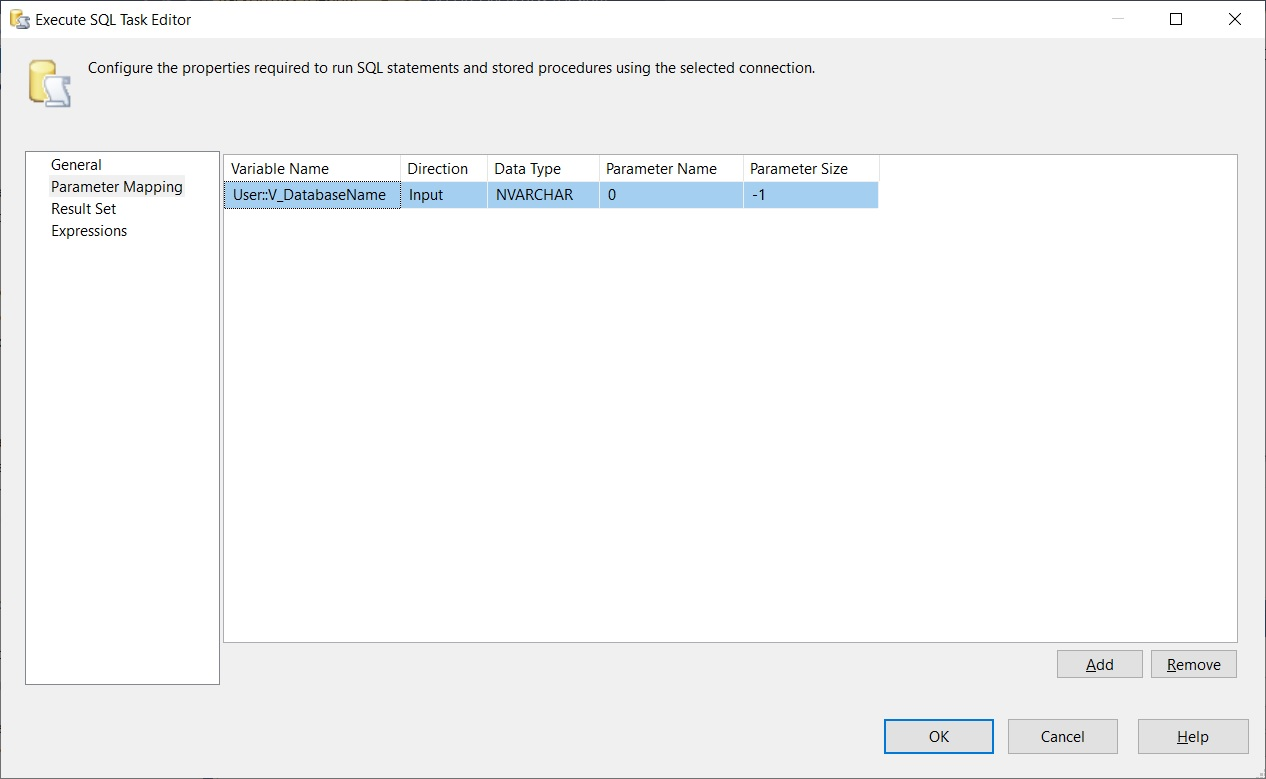

**This will insert a record into the BackupLog table with the following information:**

* The name of the database that was backed up.
* The type of log entry (in this case, Create Backup).
* The date and time the log entry was created.

**By logging the backup activity, we can track the history of backups and identify any potential problems.**

**To move the backup files onto our system, we can use a File System Task from the Toolbox.**

1. Drag a **File System Task** from the Toolbox to the Control Flow.
2. Double-click the **File System Task** to open the File System Task Editor.
3. In the **IsSourcePathVariable** property, set the value to ```TRUE```.
4. In the **Source Variable** property, select the ```V_BackupPath``` variable.
5. In the **Operation** property, select the Move File option.
6. In the **OverwriteDestination** property, set the value to ```TRUE```.
7. In the **Destination Connection** property, select the connection that points to the location where the backup files should be moved.

**The following image show how to set the properties of the File System Task:**

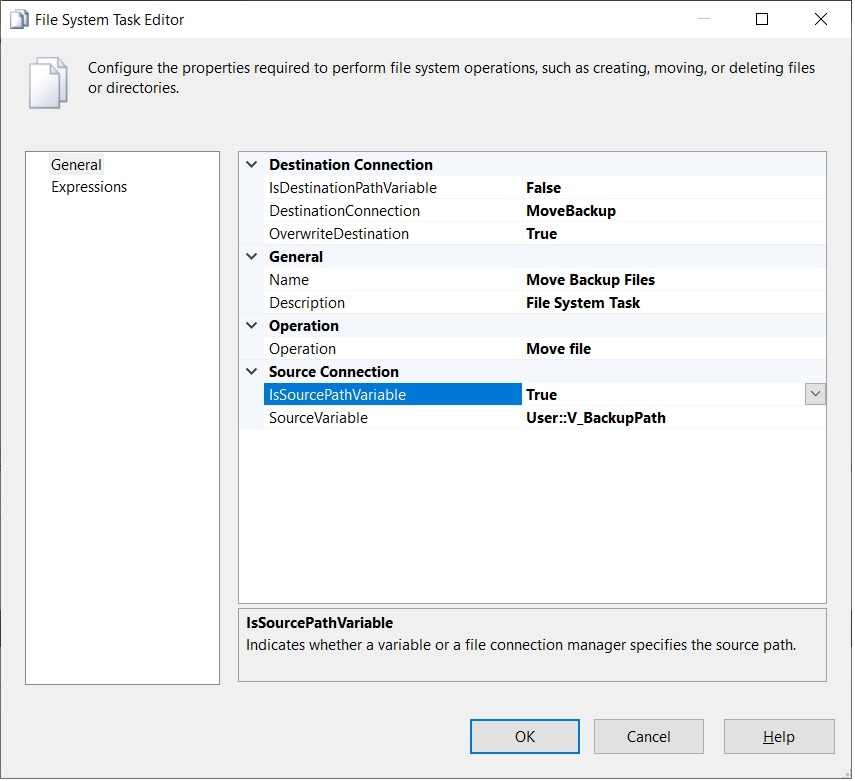

**This will move the backup file to the new location.**

**By setting the ```IsSourcePathVariable``` property to ```TRUE```, we can avoid having to hard-code the path to the backup file in the package. This makes the package more portable and easier to maintain.**

**Setting the ```OverwriteDestination``` property to ```TRUE``` ensures that the backup file will be overwritten if it already exists in the destination location. This prevents us from accidentally overwriting the wrong file.**


**To complete the process, we will insert a log entry into the BackupLog table to record the file move. The following query will be used:**

```SQL
INSERT INTO BackUpLog (DatabaseName, LogType, ActionDate) VALUES (?, 'MoveFile', GETDATE())


**We can copy the Execute SQL Task from Step 2 and modify it to use this new query.**

**Here are some specific changes that can be made to the Execute SQL Task:**

* The query text should be updated to the new query shown above.
* The parameter markers should be updated to match the values of the DatabaseName and LogType variables.
* The ActionDate variable should be set to the current date and time.

**Once these changes have been made, the Execute SQL Task will be able to insert a log entry into the BackupLog table to record the file move.**